## Spotify Top 50 Songs Analysis - 2019

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn #Seaborn is a Python data visualization library based on matplotlib.
import os #The OS module in python provides functions for interacting with the operating system.
import warnings

In [73]:
spotify_data = pd.read_csv('top50.csv', encoding = 'ISO-8859-1')

## First Step: Rougly Look Through the Data

In [74]:
spotify_data.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [75]:
spotify_data.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [76]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [77]:
spotify_data.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

## Second Step: Visualized Spotiy Top 50 Data

## 1. Visulized Data with Catplot

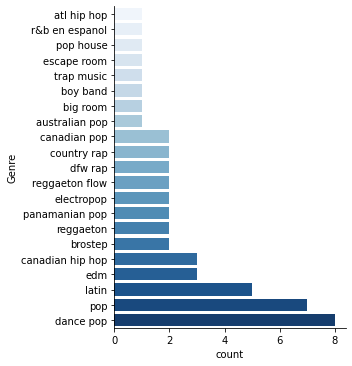

In [109]:
# Number of Songs in Different Genres
a = spotify_data.groupby(['Genre']).size().reset_index(name = "counts")
Genre_order = a.sort_values(by = ("counts"), ascending = True).iloc[:,0]
sn.catplot(data = spotify_data,  y="Genre", kind = "count", order = Genre_order, palette = "Blues")
plt.show()

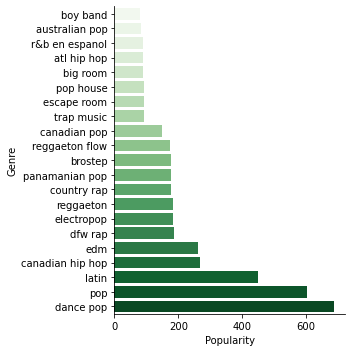

In [132]:
# Popularity of Songs in Different Genres

b = spotify_data.groupby(["Genre"], as_index = False).sum()

# when as_index=True, the grouped columns will be the indices of the returned object.#
# Passing as_index=False will return the groups that you are aggregating over, if they are named columns.#

popularity_order = b.sort_values(by=["Popularity"], ascending = True).iloc[:,0]

sn.catplot(data=b, y="Genre", x="Popularity",kind="bar", order = popularity_order, palette="Greens")

In [118]:
b

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Genre,,,,,,,,,,,
atl hip hop,34,98,59,80,-7,13,18,200,2,15,89
australian pop,27,98,59,82,-6,18,54,210,69,10,83
big room,36,114,72,66,-7,14,32,164,18,6,89
boy band,39,138,73,84,-5,11,95,181,4,6,80
brostep,94,188,141,135,-5,75,111,396,26,10,176
canadian hip hop,62,327,135,240,-19,45,100,579,65,16,269
canadian pop,27,241,137,145,-10,21,162,382,53,9,149
country rap,31,290,121,158,-12,23,112,272,39,18,178
dance pop,223,895,479,562,-49,124,367,1621,216,122,686
